In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [3]:
def plot_boxplot(data_for, data_parallel_for, data_openmp, title):
    fig, ax = plt.subplots(figsize=[10, 8])

    boxs = []
    ticks = []
    colors = []

    # Primo box: versione sequenziale
    boxs.append(data_for)
    ticks.append("for")
    colors.append("orange")

    # Aggiungi coppie (parallel_for, openmp) per ogni numero di thread
    for i in range(len(data_parallel_for)):
        boxs.append(data_parallel_for[i])
        boxs.append(data_openmp[i])
        # Etichette duplicate, ma le rendiamo visivamente chiare
        ticks.append(f"{n_threads[i]}")  
        ticks.append(f"{n_threads[i]}")  
        colors.extend(["skyblue", "lightgreen"])

    # Crea il boxplot
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    # Applica colori ai box
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Etichette e titolo
    ax.set_xlabel('Threads')
    ax.set_ylabel('Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks, rotation=30)
    ax.set_yscale('log')

    # Legenda
    legend_handles = [
        Patch(facecolor='orange', label='for (sequential)'),
        Patch(facecolor='skyblue', label='parallel_for'),
        Patch(facecolor='lightgreen', label='OpenMP')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Calcolo e stampa delle mediane ---
    medians = [np.median(d) for d in boxs]
    print("\n=== BOX PLOT MEDIANS ===")
    print(f"{'Label':<15} | {'Median (µs)':>12}")
    print("-" * 30)

    print(f"{'for':<15} | {medians[0]:>12.2f}")
    idx = 1
    for i in range(len(data_parallel_for)):
        print(f"parallel_for (th={n_threads[i]}): {medians[idx]:>10.2f} µs")
        print(f"OpenMP       (th={n_threads[i]}): {medians[idx+1]:>10.2f} µs")
        idx += 2
    print("=" * 30 + "\n")

In [4]:
def plot_speedup(dati_parallel,dati_openmp,title,threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    parallel_median = [np.median(datum) for datum in dati_parallel]
    speedup_parallel = np.zeros(len(threads))

    openmp_median = [np.median(datum) for datum in dati_openmp]
    speedup_openmp = np.zeros(len(threads))


    for i in range(len(threads)):
        speedup_parallel[i] = parallel_median[0]/parallel_median[i+1]
        speedup_openmp[i] = openmp_median[0]/openmp_median[i+1]

    ax.plot(threads,speedup_parallel,'o--')
    ax.plot(threads,speedup_openmp,'x--')

    ax.legend(['speedup_threadpool','speedup_OpenMP'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(threads)
    ax.set_xticklabels(threads, rotation = 45)
    ax.set_xscale('log',base=2)
    ax.set_yscale('log',base=2)

    ax.set(xlabel = 'Threads',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa speedup ---
    print("\n=== SPEEDUP VALUES ===")
    for i, t in enumerate(threads):
        print(f"{t} threads -> threadpool: {speedup_parallel[i]:.2f} | OpenMP: {speedup_openmp[i]:.2f}")
    print("=======================\n")

## prestazioni parallel_for al variare di granularity

In [5]:
#set parameter
n_runs = 50
n_size = 8000 #costo singola iterazione
n_threads = [1,2,4,8,16,32,64,96]
size_queue = 1024
granularity = 25

In [6]:
# for
dati_for = [649478 ,654096 ,832887 ,681430 ,840581 ,677452 ,757508 ,760008 ,650532 ,694023 ,759323 ,715640 ,650791 ,655365 ,724560 ,726093 ,715874 ,651426 ,649590 ,653253]

# parallel_for
dati_parallel = []
dati_parallel_thread1 = [666297 ,666505 ,747337 ,745402 ,734413 ,669399 ,667246 ,743549 ,739771 ,671254 ,731376 ,669387 ,675446 ,742209 ,664756 ,739278 ,671458 ,688670 ,713262 ,669462]
dati_parallel_thread2 = [378945 ,335571 ,334259 ,334965 ,335422 ,334877 ,376981 ,335283 ,337941 ,334295 ,334899 ,367145 ,340654 ,335552 ,340735 ,341561 ,337401 ,336560 ,336916 ,336948]
dati_parallel_thread4 = [168048 ,167072 ,166538 ,170040 ,168518 ,167323 ,206938 ,168176 ,167896 ,168128 ,168100 ,168502 ,204518 ,168416 ,168656 ,167726 ,167517 ,197709 ,168302 ,168633]
dati_parallel_thread8 = [84891 ,84847 ,84664 ,85048 ,84845 ,84359 ,85384 ,85267 ,84946 ,85129 ,85227 ,85293 ,107339 ,84340 ,85192 ,87309 ,84284 ,84713 ,84910 ,84258 ]
dati_parallel_thread16 = [43267 ,42167 ,42344 ,42941 ,41862 ,42212 ,41740 ,42677 ,42158 ,43499 ,42658 ,43569 ,41821 ,43770 ,43521 ,43632 ,43593 ,43179 ,44099 ,43307]
dati_parallel_thread32 = [42007 ,36973 ,37147 ,37044 ,36917 ,36562 ,36036 ,36157 ,36671 ,35537 ,36281 ,36778 ,35293 ,35536 ,36832 ,37041 ,35637 ,36377 ,35731 ,36823]
dati_parallel_thread64 = [33604 ,27122 ,26737 ,20589 ,21074 ,20898 ,20905 ,20902 ,20910 ,20925 ,20909 ,20907 ,20855 ,20863 ,20790 ,20875 ,20759 ,20829 ,20839 ,20849 ]
dati_parallel_thread96 = [59981 ,28345 ,26474 ,22187 ,21332 ,22632 ,21546 ,17441 ,18881 ,19654 ,21048 ,20257 ,21152 ,21537 ,20660 ,21130 ,20324 ,19677 ,20014 ,20429]

n_threads = [1, 2, 4, 8, 16, 32, 64, 96]

for i in n_threads:
    dq = locals()[f"dati_parallel_thread{i}"]
    dati_parallel.append(dq)

# openmp
dati_openMp = []
dati_openMp_thread1 = [668279 ,657659 ,693590 ,883004 ,657008 ,658376 ,656517 ,657885 ,713208 ,829785 ,680345 ,660249 ,770178 ,794242 ,658307 ,663059 ,744590 ,742494 ,711599 ,679783]
dati_openMp_thread2 = [343850 ,334518 ,335435 ,334564 ,333983 ,335211 ,333944 ,331785 ,332152 ,333697 ,331802 ,332074 ,438685 ,335017 ,330993 ,331338 ,331162 ,330518 ,330365 ,330966 ]
dati_openMp_thread4 = [172193 ,169889 ,167117 ,165855 ,165056 ,164699 ,165245 ,164654 ,164882 ,164867 ,201282 ,222449 ,176631 ,233407 ,165320 ,193543 ,213027 ,168012 ,246158 ,169989]
dati_openMp_thread8 = [87042 ,82748 ,82679 ,82732 ,82599 ,96935 ,170464 ,83540 ,82818 ,82820 ,102249 ,181707 ,83857 ,82407 ,82372 ,82385 ,82757 ,82367 ,82438 ,82407]
dati_openMp_thread16 = [44350 ,43618 ,42606 ,42402 ,43076 ,42474 ,42550 ,43070 ,42591 ,42505 ,42858 ,42390 ,84797 ,54081 ,42793 ,42988 ,42306 ,42490 ,42573 ,42423]
dati_openMp_thread32 = [25160 ,22433 ,22272 ,22394 ,22379 ,22303 ,22284 ,22351 ,22765 ,22357 ,22602 ,22434 ,22354 ,22387 ,22353 ,22383 ,22514 ,22378 ,22292 ,22358]
dati_openMp_thread64 = [24524 ,20202 ,20147 ,20134 ,20596 ,25496 ,20139 ,20212 ,22228 ,20232 ,20409 ,20095 ,20231 ,20196 ,20018 ,20100 ,20104 ,20353 ,20147 ,20101]
dati_openMp_thread96 = [27531 ,19589 ,17509 ,15926 ,15266 ,15412 ,15439 ,15432 ,15393 ,15414 ,15409 ,15362 ,15405 ,15412 ,15384 ,15395 ,15378 ,15360 ,15404 ,15416]

for i in n_threads:
    dq = locals()[f"dati_openMp_thread{i}"]
    dati_openMp.append(dq)



=== BOX PLOT MEDIANS ===
Label           |  Median (µs)
------------------------------
for             |    687726.50
parallel_for (th=1):  682058.00 µs
OpenMP       (th=1):  680064.00 µs
parallel_for (th=2):  336738.00 µs
OpenMP       (th=2):  332924.50 µs
parallel_for (th=4):  168239.00 µs
OpenMP       (th=4):  168950.50 µs
parallel_for (th=8):   84928.00 µs
OpenMP       (th=8):   82752.50 µs
parallel_for (th=16):   43060.00 µs
OpenMP       (th=16):   42598.50 µs
parallel_for (th=32):   36616.50 µs
OpenMP       (th=32):   22378.50 µs
parallel_for (th=64):   20900.00 µs
OpenMP       (th=64):   20199.00 µs
parallel_for (th=96):   21089.00 µs
OpenMP       (th=96):   15410.50 µs


=== SPEEDUP VALUES ===
1 threads -> threadpool: 1.01 | OpenMP: 1.01
2 threads -> threadpool: 2.04 | OpenMP: 2.07
4 threads -> threadpool: 4.09 | OpenMP: 4.07
8 threads -> threadpool: 8.10 | OpenMP: 8.31
16 threads -> threadpool: 15.97 | OpenMP: 16.14
32 threads -> threadpool: 18.78 | OpenMP: 30.73
64 threads -

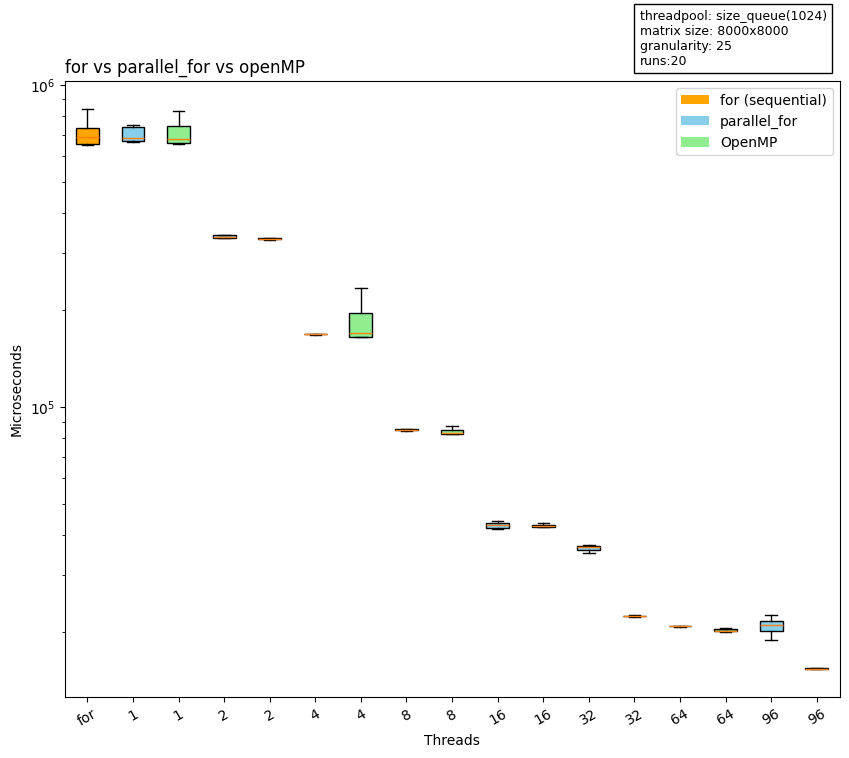

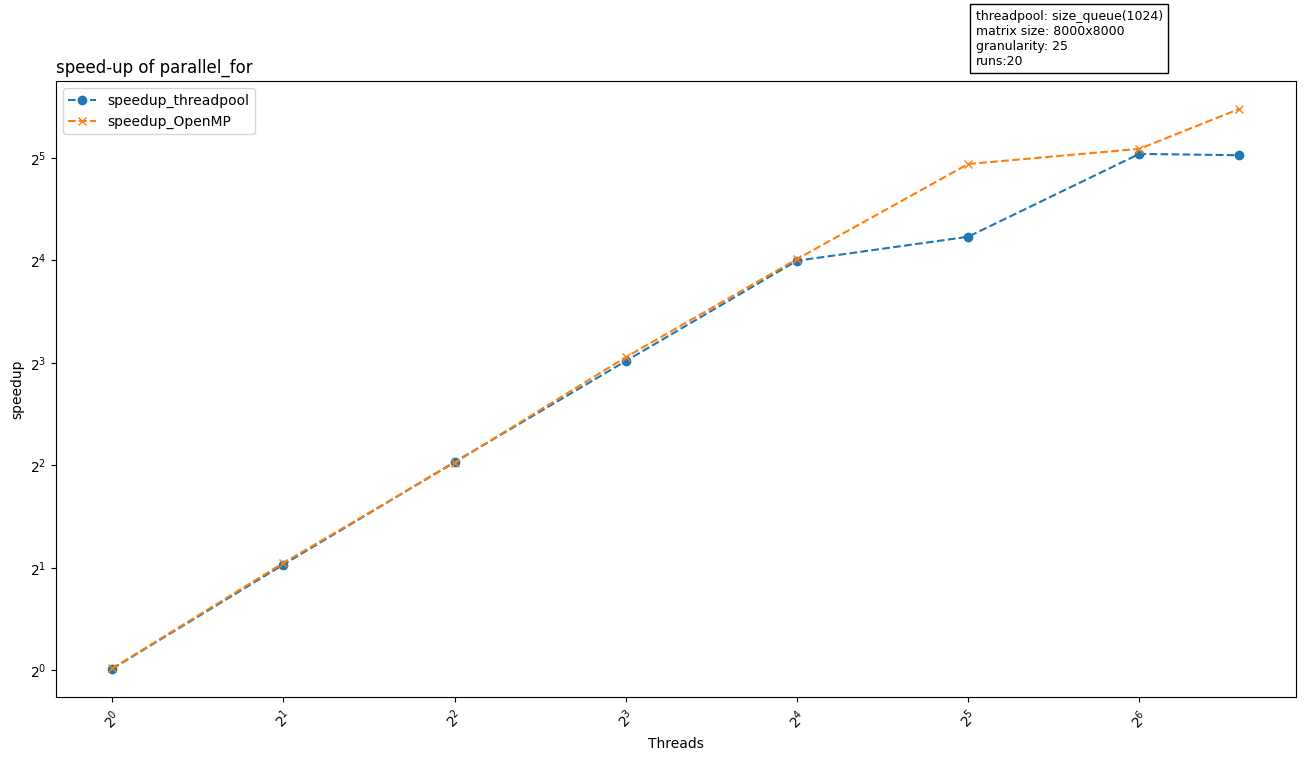

In [7]:
plot_boxplot(dati_for, dati_parallel,dati_openMp,"for vs parallel_for vs openMP")
data_parallel = []
data_open = []
data_parallel.append(dati_for)
data_open.append(dati_for)
for i in range(len(n_threads)):
    data_parallel.append(dati_parallel[i])
    data_open.append(dati_openMp[i])

plot_speedup(data_parallel,data_open,"speed-up of parallel_for",n_threads)


=== SPEEDUP VALUES ===
1 threads -> threadpool: 1.01 | OpenMP: 1.01
2 threads -> threadpool: 2.04 | OpenMP: 2.07
4 threads -> threadpool: 4.09 | OpenMP: 4.07
8 threads -> threadpool: 8.10 | OpenMP: 8.31
16 threads -> threadpool: 15.97 | OpenMP: 16.14
32 threads -> threadpool: 18.78 | OpenMP: 30.73
64 threads -> threadpool: 32.91 | OpenMP: 34.05
96 threads -> threadpool: 32.61 | OpenMP: 44.63



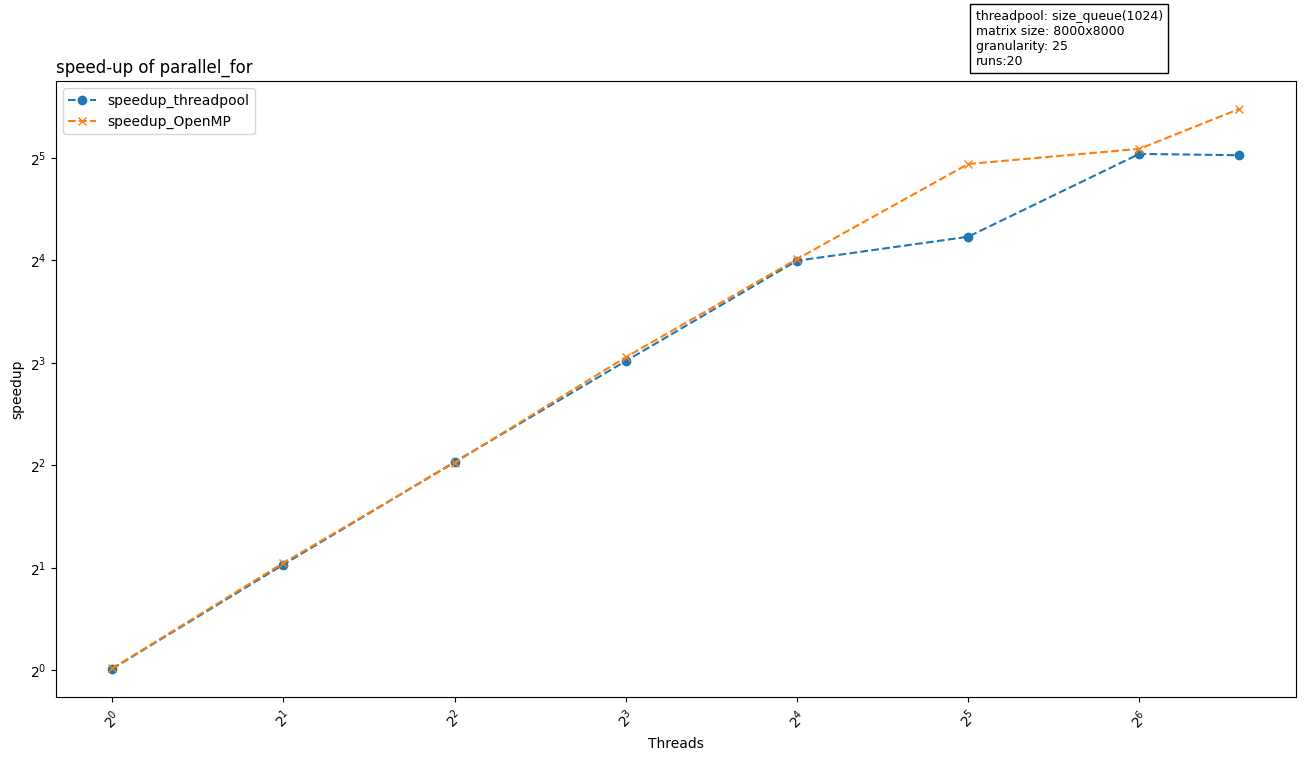

In [8]:
data_parallel = []
data_open = []
data_parallel.append(dati_for)
data_open.append(dati_for)
for i in range(len(n_threads)):
    data_parallel.append(dati_parallel[i])
    data_open.append(dati_openMp[i])

plot_speedup(data_parallel,data_open,"speed-up of parallel_for",n_threads)